## Replace and Retire program
This script calculates the LCA of the Replace and Retire program

Import and run necessary scripts to import some libraries, functions, variables etc. 

In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")


In [2]:
%run initialize_notebook.ipynb

In [3]:
plt.style.use('seaborn')

## Preparing the input data 

Calculation of the LCA results for cars:

In [4]:
%run LCA_calculation.ipynb

Input data - number of old and new cars by size and emission concepts: 

2575158.0
1237060.0


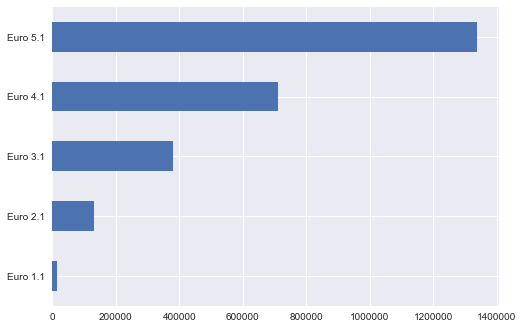

1122444.0
0.4358738376441368
[('09162  MUENCHEN,STADT                   ', 0.26567474489089693), ('05119  OBERHAUSEN,STADT                 ', 0.44483982534653826), ('15091  WITTENBERG                       ', 0.10103133941047308)]
[('05911  BOCHUM,STADT                     ', 0.43003293285357075), ('05314  BONN,STADT                       ', 0.5319831986632179), ('08111  STUTTGART,STADT                  ', 0.2251357052172783)]
2000000.000000001
08111  STUTTGART,STADT             
08115  BOEBLINGEN                  
08116  ESSLINGEN                   
08118  LUDWIGSBURG                 
08119  REMS-MURR-KREIS             
08121  HEILBRONN,STADT             
08135  HEIDENHEIM                  
08222  MANNHEIM,STADT              
08236  ENZKREIS                    
08311  FREIBURG I.BREISG.STADT     
08415  REUTLINGEN                  
08416  TUEBINGEN                   
09162  MUENCHEN,STADT              
09564  NUERNBERG,STADT             
09761  AUGSBURG,STADT              
11000  BERL

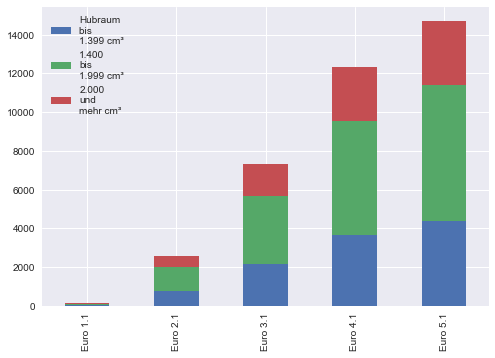

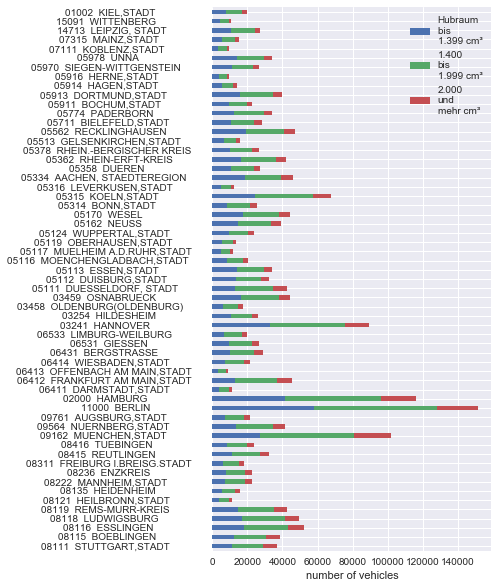

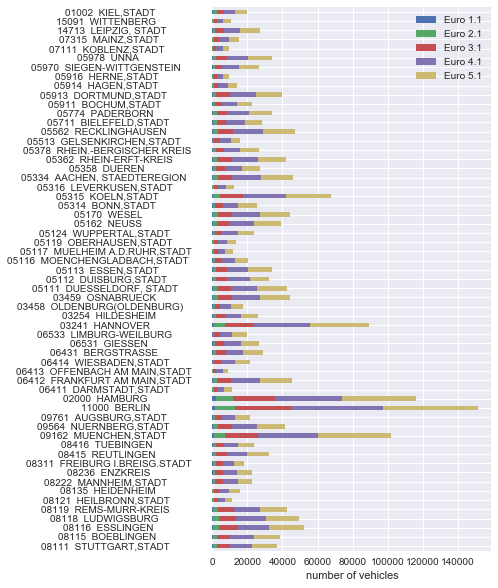

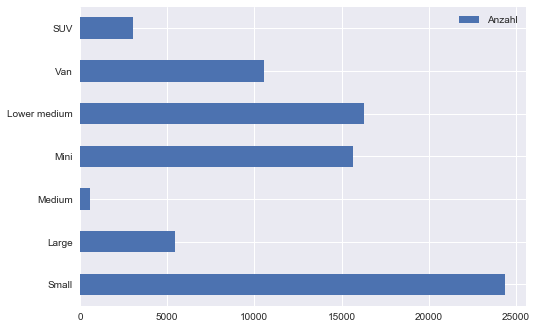

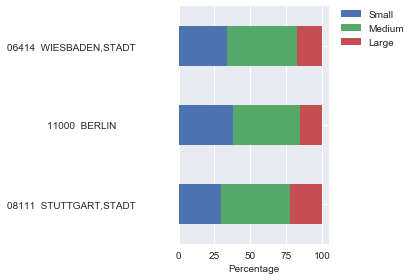

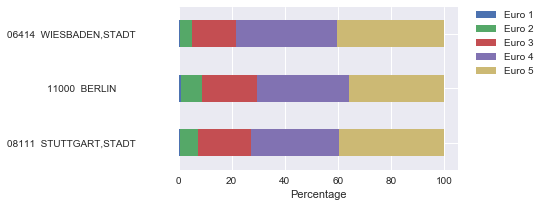

<Figure size 72x72 with 0 Axes>

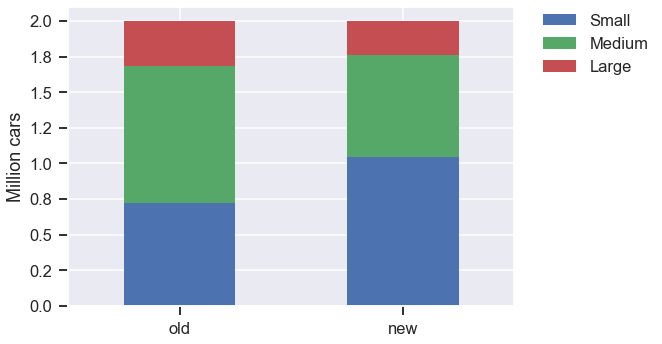

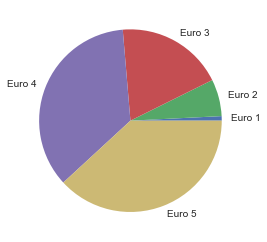

In [5]:
%run Input_data_BEV.ipynb

Annual kilometers driven - so far we assume 14 000 km for both diesel and BEVs and the same for all size classes
- 140000 km is about the average annual mileage of diesel and BEV in Germany 2014 (source: https://www.bast.de/BASt_2017/DE/Verkehrssicherheit/Fachthemen/u2-fahrleistung-2014/u2-Fahrleistung-2014-ergebnisse.html?nn=1817128)

In [6]:
mileage_BEV = pd.DataFrame([{'Small': 14000, 'Medium': 14000, 'Large': 14000}], columns = ['Small', 'Medium', 'Large'])
mileage_BEV.index = ['BEV']

mileage_diesel = pd.DataFrame([{'Small': 14000, 'Medium': 14000, 'Large': 14000}, {'Small': 14000, 'Medium': 14000, 'Large': 14000},{'Small': 14000, 'Medium': 14000, 'Large': 14000},{'Small': 14000, 'Medium': 14000, 'Large': 14000},{'Small': 14000, 'Medium': 14000, 'Large': 14000}], columns = ['Small', 'Medium', 'Large'])
mileage_diesel.index = ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']


Years remaining (years before the vehicles will be scrapped): 


In [7]:
years_left = pd.DataFrame({'Euro 1': [2.69, 1.97,1.01], 'Euro 2': [3.06, 2.46, 1.35], 'Euro 3': [4.2, 3.5, 2.23], 'Euro 4': [5.59,5, 3.7], 'Euro 5':[7.81, 7.33, 6.22]})
years_left.index = ['High', 'Medium', 'Low']
print(years_left)

#Defining the scenario for the years remaining - calculated based on different survival curves 
scenario = 'Medium'

        Euro 1  Euro 2  Euro 3  Euro 4  Euro 5
High      2.69    3.06    4.20    5.59    7.81
Medium    1.97    2.46    3.50    5.00    7.33
Low       1.01    1.35    2.23    3.70    6.22


Calculating the total kilometers driven for each car categoty (size and euro class) in each county for the old diesel vehicles and the BEV. We don't know the size of a BEV traded for a specific euro class, so we replace the average:

- df_old  and df_new is the dataframe of old cars by size and emission concept in each county 
- mileage_diesel and mileage_bev is the annual kilometers driven by size and emission concept 
- years_left is the years remaining before scrappage for each euro class 

Total kilometers driven by the old cars:

In [8]:
#Calculating the kilometers driven in the period "years remaining", by multiplying the annual mileage for each emission concept with the "years remaining" for each emission concept 
fd = [mileage_diesel.T.iloc[:,i]*years_left.loc[scenario][i] for i in [0,1,2,3,4]] #km/years
total_mileage_diesel = pd.concat(fd, axis = 1) #km/program period/car

#Multiply total kilometers driven in program period with the number of cars in each county to create dataframe with total kilometers for the total number of cars by euro and size class in each county 
total_km_old = pd.concat([pd.DataFrame(np.multiply(total_mileage_diesel.to_numpy(), df_old.xs(index_list[i], level = 0).T.to_numpy())).T for i in np.arange(len(index_list))], keys = index_list).reset_index()
total_km_old['level_1'].replace({0: 'euro 1', 1: 'euro 2', 2: 'euro 3', 3: 'euro 4', 4: 'euro 5'}, inplace = True)
total_km_old.set_index(['level_0', 'level_1'], inplace = True)
total_km_old.columns = ['Small', 'Medium', 'Large']
total_km_old.head(10) #km/program period

Small        Medium  \
level_0                             level_1                               
08111  STUTTGART,STADT              euro 1   1.246533e+06  2.001822e+06   
                                    euro 2   2.645169e+07  4.247909e+07   
                                    euro 3   1.065218e+08  1.710648e+08   
                                    euro 4   2.566832e+08  4.122107e+08   
                                    euro 5   4.487302e+08  7.206215e+08   
08115  BOEBLINGEN                   euro 1   2.001811e+06  3.002992e+06   
                                    euro 2   2.698391e+07  4.047959e+07   
                                    euro 3   1.126127e+08  1.689345e+08   
                                    euro 4   3.063086e+08  4.595051e+08   
                                    euro 5   4.872709e+08  7.309735e+08   

                                                    Large  
level_0                             level_1                
08111  STUTTGART,STADT              euro 1   9.438049e+05  
                                    euro 2   2.002774e+07  
                                    euro 3   8.065239e+07  
                                    euro 4   1.943461e+08  
                                    euro 5   3.397534e+08  
08115  BOEBLINGEN                   euro 1   1.311017e+06  
                                    euro 2   1.767218e+07  
                                    euro 3   7.375180e+07  
                                    euro 4   2.006063e+08  
                                    euro 5   3.191213e+08

Total kilometers driven by the new cars:

In [9]:
#Calculate the average years remaining as the weighted average of cars of each emission concept and the corresponding "years remaining"

avg_years_remaining = [sum(df_old.loc[index_list[i]].sum(axis = 1)/sum(df_old.loc[index_list[i]].sum(axis = 1))*years_left.loc[scenario].values) for i in np.arange(len(index_list))]
print(pd.DataFrame(list(zip(index_list,avg_years_remaining))).set_index(0))

#Multiplying the distribution of new cars (df_new) with the mileage of new BEVs for all counties and the years remaining
total_km_new  = pd.concat([pd.DataFrame(df_new.loc[index_list[i]]*mileage_BEV.loc['BEV']*avg_years_remaining[i]).T for i in np.arange(len(index_list))], keys = index_list).reset_index().set_index('level_0').drop('level_1', axis = 1)
total_km_new.head(10)

                                            1
0                                            
08111  STUTTGART,STADT               5.438913
08115  BOEBLINGEN                    5.440300
08116  ESSLINGEN                     5.388830
08118  LUDWIGSBURG                   5.419596
08119  REMS-MURR-KREIS               5.308520
08121  HEILBRONN,STADT               5.409128
08135  HEIDENHEIM                    5.439217
08222  MANNHEIM,STADT                5.346428
08236  ENZKREIS                      5.374642
08311  FREIBURG I.BREISG.STADT       5.169429
08415  REUTLINGEN                    5.450284
08416  TUEBINGEN                     5.366518
09162  MUENCHEN,STADT                5.491167
09564  NUERNBERG,STADT               5.386540
09761  AUGSBURG,STADT                5.436485
11000  BERLIN                        5.299704
02000  HAMBURG                       5.261568
06411  DARMSTADT,STADT               5.426739
06412  FRANKFURT AM MAIN,STADT       5.535079
06413  OFFENBACH AM MAIN,STADT    

,Small,Medium,Large
level_0,,,
"08111 STUTTGART,STADT",1.276055e+09,1.039660e+09,5.080203e+08
08115 BOEBLINGEN,1.401383e+09,1.066567e+09,4.825867e+08
08116 ESSLINGEN,2.000460e+09,1.409368e+09,5.253216e+08
08118 LUDWIGSBURG,1.901901e+09,1.372346e+09,4.960759e+08
08119 REMS-MURR-KREIS,1.588580e+09,1.130129e+09,4.288123e+08
"08121 HEILBRONN,STADT",4.228311e+08,3.265927e+08,1.136016e+08
08135 HEIDENHEIM,5.958946e+08,4.426272e+08,1.494538e+08
"08222 MANNHEIM,STADT",8.104363e+08,6.381149e+08,2.230410e+08
08236 ENZKREIS,8.672453e+08,5.993788e+08,2.171058e+08


Plotting the total kilometers driven in the years remaining for the diesel cars (old) and BEV (new). See that when we assume the same mileage for all sizes, emission concepts and powertrain the kilometers driven are equal as expected: 

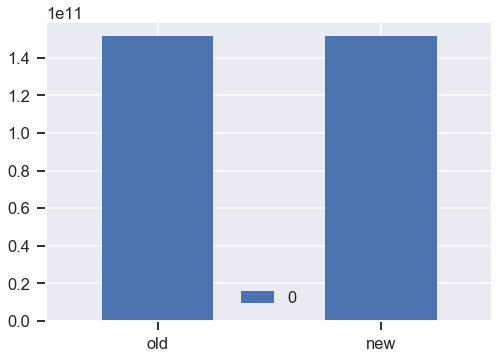

In [10]:
plot_tot_mileage = pd.DataFrame([sum(total_km_old.groupby('level_0').sum().sum()), sum(total_km_new.groupby('level_0').sum().sum())])
plot_tot_mileage.index = ['old', 'new']
plot_tot_mileage.plot.bar(rot=0)

## Calculation of life-cycle emissions for the BAU and RaR scenarios

In this section the comparasion between the two different scenarios are considered: either BAU or RaR. 
BAU implies that the old cars are driven during the period between early and natural scrapping, while RaR implies that the BEV are driven in this period. Additionally, RaR needs to account for the production and disposal emissions from these BEVs attributed to the specific period. 
 

Variables: 
- total_km_old dataframe with km driven in the years remaining by the diesel cars in each county by euro class and size
- total_km_new dataframe with km driven in the years remaining by the BEVs in each county by size 
- current_cars_lca_agg_avg dataframe with lca score (climate change, metal depletion, photochemical oxidant formation and particulate matter formation) for BEVs AND average German electricity mix for charging 
- current_cars_lca_agg_marginal dataframe with lca score for BEVs AND MARGINAL German electricity mix for charging 
- older_cars_lca_agg dataframe with lca score for conventional vehicles for each euro class
- impact_old_cars stores the LCA impact of the diesel cars in the years remaining (LCA impact/km * tot_km_old)
- impact_new_cars stores the LCA impact of the BEV cars in the years remaining and does in addition account for the share of production and disposal emissions

The LCA results are calculated for a lifetime of 200 000 km. 

Number of new and old cars by emission concept and size in each county:

In [11]:
older_cars_lca_agg.head()

#Only need the BEV from this dataframe 
current_BEV_lca_agg_avg = current_cars_lca_agg_avg.iloc[0:7]
current_BEV_lca_agg_avg.head()
current_BEV_lca_agg_marginal = current_cars_lca_agg_marginal.iloc[0:7]

Defining function to calculate results and plot for each county: 

In [12]:
kg_to_mt = 1/(1000*1000*1000)

In [13]:
def calc_LCA_program(county):
    impact_old_cars = list()
    impact_new_cars_avg = list()
    impact_new_cars_marginal = list()
    savings_avg = list()
    savings_marginal = list()

    #Impact of diesel cars 
    for index, row in older_cars_lca_agg.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
            for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']: 
                if size in str(index[1]) and euro in str(index[0]): 
                    if 'ICEV-d' in str(index[1]):
                        temp = pd.DataFrame(row) #impact/km 
                        temp[temp.select_dtypes(include=['number']).columns]*=total_km_old.loc[county].loc[euro,size]
                        impact_old_cars.append(temp.T)

    #Want only the use phase emissions (so drop production and disposal)
    impact_old_cars = pd.concat(impact_old_cars).drop('prod_disp', level=1, axis=1)

    #Impact of BEV average electricity mix 
    for index, row in current_BEV_lca_agg_avg.iterrows():
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                impact_new_cars_avg.append(temp.T)
    impact_new_cars_avg = pd.concat(impact_new_cars_avg)

    #Impact of BEV marginal electricity mix 
    for index, row in current_BEV_lca_agg_marginal.iterrows():
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                impact_new_cars_marginal.append(temp.T)
    impact_new_cars_marginal = pd.concat(impact_new_cars_marginal)

    #Calculate the savings of the program (>0 increased emissions, <0 decreased emissions)
    for cat in ['CC', 'POF', 'PMF']: 
        bau_avg = impact_old_cars[cat].sum(axis = 0)*kg_to_mt
        rar_avg = impact_new_cars_avg[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        savings_avg.append(sum(rar_avg) - sum(bau_avg))
        
        bau_marginal = impact_old_cars[cat].sum(axis = 0)*kg_to_mt
        rar_marginal = impact_new_cars_marginal[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        savings_marginal.append(sum(rar_marginal) - sum(bau_avg))
        
        
    return savings_avg, savings_marginal, impact_old_cars, impact_new_cars_avg, impact_new_cars_marginal


In [14]:
def plot_results_rar_bau(impact_old_cars, impact_new_cars_avg, impact_new_cars_marginal): 
    results_rar_avg = list() 
    results_bau = list()
    results_rar_marginal = list()
    sns.set_context("talk")

    #Preparing figure design
    fig  = plt.figure()
    unit = ['Mt Co2 eq.','Mt NMVOC', 'Mt PM10 eq.']
    j = 1
    cats = ['CC','POF', 'PMF'] 
    changed_color_order = sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[1], sns.color_palette()[-1], sns.color_palette()[4]
    titles = ['Climate\nchange', 'Photochemical\noxidant formation', 'Particulate matter\nformation']
    
    for cat in cats:

        #Impact for each category and sum over the cars 
        bau = impact_old_cars[cat].sum(axis = 0)*kg_to_mt
        results_bau.append(bau)
        rar_avg = impact_new_cars_avg[cat].sum(axis = 0)*kg_to_mt #including the production for new cars 
        results_rar_avg.append(rar_avg)
        rar_marginal = impact_new_cars_marginal[cat].sum(axis = 0)*kg_to_mt
        results_rar_marginal.append(rar_marginal)

        #Plotting result
        ax = fig.add_subplot(1,3,j)
        dataframe_to_plot = pd.concat([rar_avg, rar_marginal, bau], keys = ['RaR average', 'RaR marginal', 'BAU']).unstack()[['fuel', 'direct', 'market for road', 'maintenance, passenger car', 'prod_disp']]
        ax = dataframe_to_plot.plot(kind='bar', stacked=True, ax = ax, title = titles[j-1], legend = None, color=changed_color_order, fontsize = 14)
        ax.set_ylabel(unit[j-1], fontsize = 14)
        
        j+=1

    #Setting legend and modifying a bit     
    handles, labels = ax.get_legend_handles_labels()
    labels = ['Electricity production\nDiesel production', 'Direct air pollutant\nemissions', 'Road', 'Car maintenance', 'Car production and disposal']
    ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor = (1.05,1))
    #ax.legend(['Electricity production \n Diesel production', 'Direct', 'Road', 'Maintenance', 'Production and disposal'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 14)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    plt.rcParams['patch.linewidth'] = 0
    plt.rcParams['patch.edgecolor'] = 'none'
     
    #fig.savefig('lca results 2.svg', bbox_inches = 'tight')

    
    return fig, dataframe_to_plot

## Plotting the impact of the program in all counties 
Here the impact of the program (either marginal or average electricity mix) for ALL counties is plotted

The impact of old and new cars, summed over all counties are first calculated: 

In [15]:
results = [calc_LCA_program(county) for county in index_list]

In [16]:

impact_old_cars_tot = pd.DataFrame([results[i][2].sum() for i in range(len(index_list))])
impact_old_cars_tot.index = index_list


impact_new_cars_average = pd.DataFrame([results[i][3].sum() for i in range(len(index_list))])
impact_new_cars_average.index = index_list


impact_new_cars_marginal = pd.DataFrame([results[i][4].sum() for i in range(len(index_list))])
impact_new_cars_marginal.index = index_list


(<Figure size 576x396 with 3 Axes>,
                   fuel    direct  market for road  maintenance, passenger car  \
 RaR average   0.011000  0.002524         0.008520                    0.001517   
 RaR marginal  0.006008  0.002524         0.008520                    0.001517   
 BAU           0.009317  0.030377         0.007854                    0.001386   
 
               prod_disp  
 RaR average    0.046955  
 RaR marginal   0.046955  
 BAU                 NaN  )

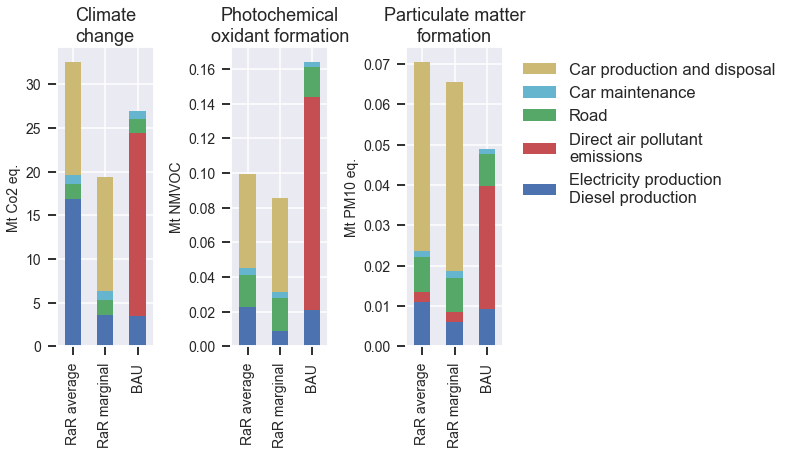

In [17]:
plot_results_rar_bau(impact_old_cars_tot, impact_new_cars_average, impact_new_cars_marginal)

In [28]:
#Checking by calculating the share of production and disposal emission in another way!!!!

total_production_emissions = current_BEV_lca_agg_avg['CC']['prod_disp']*200000 #kg co2-eq. for production
lifetime = 200000/14000

#Need to add 38 % of the production and disposal emissions: 
share_of_production_emissions = avg_years_remaining[0]/lifetime

production_per_car = share_of_production_emissions*total_production_emissions
small_car_prod = production_per_car.iloc[5]
large_car_prod = production_per_car.iloc[0]
medium_car_prod = production_per_car.iloc[2]
share_of_production_emissions

#Checking this against how it is calculated above 
(df_new.iloc[0].loc['Small']*small_car_prod+df_new.iloc[0].loc['Medium']*medium_car_prod+df_new.iloc[0].loc['Large']*large_car_prod)/(impact_new_cars_average['CC']['prod_disp'].iloc[0])

1.0

Calculate the savings in each county (>0 increased emissions, <0 decreased emissions): 

In [29]:
savings_avg = pd.DataFrame([results[i][0] for i in np.arange(0,len(index_list))])
savings_avg.index = index_list
savings_avg.columns = ['CC', 'POF', 'PMF']

savings_marginal = pd.DataFrame([results[i][1] for i in np.arange(0,len(index_list))])
savings_marginal.index = index_list
savings_marginal.columns = ['CC', 'POF', 'PMF']


## Effect on air pollution 

The effect on air pollutant emissions of the RAR program is calculated

The results for air pollutant emissions per vehicle-kilometer is first calculated (takes time since it needs to do it for all cars): 

In [30]:
%run air_pollutant_impacts.ipynb

In [31]:
older_cars_POF = older_cars_POF.stack().unstack([2,3])
older_cars_PMF = older_cars_PMF.stack().unstack([2,3])

current_BEV_average_PMF = current_BEV_average_PMF.stack().unstack([1,2])
current_BEV_average_POF = current_BEV_average_POF.stack().unstack([1,2])

current_BEV_marginal_PMF = current_BEV_marginal_PMF.stack().unstack([1,2])
current_BEV_marginal_POF = current_BEV_marginal_POF.stack().unstack([1,2])

Defining then a function similar as done for each of the LCIA impact categories to calculate the emissions of the rar and bau scenarios and calculate the savings: 

In [32]:
def calc_air_poll(county):
    air_pollutants = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC' ]
    POF_list_BEV_avg, PMF_list_BEV_avg, POF_list_BEV_marginal, PMF_list_BEV_marginal, POF_list_old, PMF_list_old, savings_avg, savings_marginal = [list() for i in range(8)] 

    #Impact of the BEVs with average electricity mix
    for index, row in current_BEV_average_PMF.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                PMF_list_BEV_avg.append(temp.T)      

    for index, row in current_BEV_average_POF.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                POF_list_BEV_avg.append(temp.T)    

    #Drop NOx to avoid double-counting (incl in PMF too...)
    c = pd.concat(POF_list_BEV_avg)
    c = c.drop(['NOx'], axis = 1)

    #Air pollutant emissions of the new cars with average electricity mix
    air_pollutants_new_avg = pd.concat([(pd.concat(PMF_list_BEV_avg)), c], axis = 1)

    #Impact of the BEVs with marginal electricity mix
    for index, row in current_BEV_marginal_PMF.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                PMF_list_BEV_marginal.append(temp.T)      

    for index, row in current_BEV_marginal_POF.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: 
            if size in str(index): 
                temp = pd.DataFrame(row)
                temp[temp.select_dtypes(include=['number']).columns]*=total_km_new.loc[county,size] 
                POF_list_BEV_marginal.append(temp.T)    

    #Drop NOx to avoid double-counting (incl in PMF too...)
    c = pd.concat(POF_list_BEV_marginal)
    c = c.drop(['NOx'], axis = 1)

    #Air pollutant emissions of the new cars 
    air_pollutants_new_marginal = pd.concat([(pd.concat(PMF_list_BEV_marginal)), c], axis = 1)


    for index, row in older_cars_PMF.iterrows(): 
            for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
                for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']:
                    if size in str(index[1]) and euro in str(index[0]): 
                        if 'ICEV-d' in str(index[1]):
                            temp = pd.DataFrame(row)
                            temp[temp.select_dtypes(include=['number']).columns]*=total_km_old.loc[county].loc[euro,size]
                            PMF_list_old.append(temp.T)

    for index, row in older_cars_POF.iterrows(): 
        for size in ['Small', 'Medium', 'Large']: #loop to multiply correctly lca impact per km with km driven for old cars 
            for euro in ['euro 1', 'euro 2', 'euro 3', 'euro 4', 'euro 5']:
                if size in str(index[1]) and euro in str(index[0]): 

                    if 'ICEV-d' in str(index[1]):
                        temp = pd.DataFrame(row)
                        temp[temp.select_dtypes(include=['number']).columns]*=total_km_old.loc[county].loc[euro,size]
                        POF_list_old.append(temp.T)
    #Dropping one of the nox columns to avoid double counting                  
    a = pd.concat(POF_list_old)
    a = a.drop(['NOx'], axis = 1)


    air_pollutants_old = pd.concat([pd.concat(PMF_list_old) ,a], axis = 1).drop('prod_disp', level=1, axis=1)

    for pollutant in air_pollutants:
        bau = air_pollutants_old[pollutant].sum(axis = 0)*kg_to_mt
        rar_avg = air_pollutants_new_avg[pollutant].sum(axis = 0)*kg_to_mt #including the production for new cars 
        savings_avg.append(sum(rar_avg) - sum(bau))
        rar_marginal = air_pollutants_new_marginal[pollutant].sum(axis=0)*kg_to_mt
        savings_marginal.append(sum(rar_marginal)-sum(bau))
    return savings_avg, savings_marginal, air_pollutants_old, air_pollutants_new_marginal, air_pollutants_new_avg


Calculate the savings for each air pollutant due to the program (<0 savings, >0 increase): 

In [33]:
air_pollutants = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC' ]

#Calculating air pollutant emissions
res = [calc_air_poll(county) for county in index_list]

#Savings if using an average electricity mix
air_poll_savings_avg = pd.DataFrame([res[i][0] for i in np.arange(0,len(index_list))])
air_poll_savings_avg.columns = air_pollutants
air_poll_savings_avg.index = index_list

air_poll_savings_marginal = pd.DataFrame([res[i][1] for i in np.arange(0,len(index_list))])
air_poll_savings_marginal.columns = air_pollutants
air_poll_savings_marginal.index = index_list


bau_air_poll = pd.DataFrame([res[i][2].sum() for i in np.arange(0,len(index_list))])
bau_air_poll.index=index_list
rar_air_poll_marginal = pd.DataFrame([res[i][3].sum() for i in np.arange(0,len(index_list))])
rar_air_poll_marginal.index = index_list
rar_air_poll_avg = pd.DataFrame([res[i][4].sum() for i in np.arange(0,len(index_list))])
rar_air_poll_avg.index = index_list

C:\Users\nistad_a\AppData\Local\Continuum\miniconda3\envs\cashforclunker\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\nistad_a\AppData\Local\Continuum\miniconda3\envs\cashforclunker\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\nistad_a\AppData\Local\Continuum\miniconda3\envs\cashforclunker\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axi

Plotting changes in air pollutant emissions for the average electricity mix: 

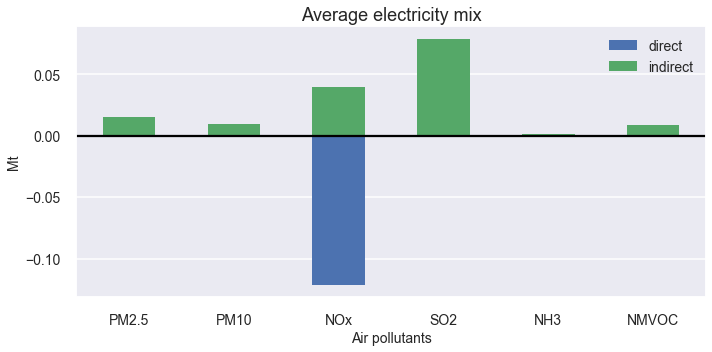

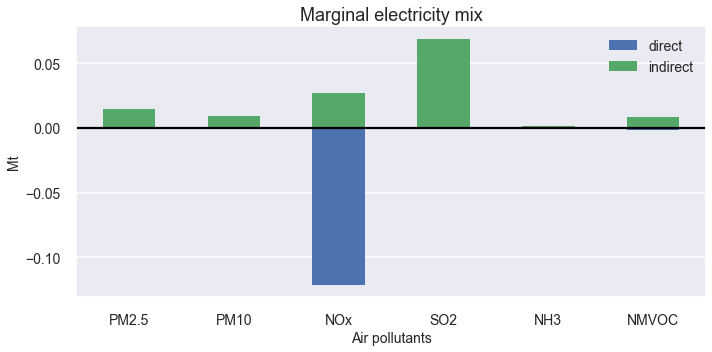

In [34]:
#Direct emission of air pollutants
air_polluntants = ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']
rar_avg_direct = pd.DataFrame([rar_air_poll_avg[poll]['direct'] for poll in air_pollutants]).T*kg_to_mt
rar_avg_direct.columns = air_pollutants
rar_avg_direct.index=index_list

rar_marginal_direct = pd.DataFrame([rar_air_poll_marginal[poll]['direct'] for poll in air_pollutants]).T*kg_to_mt
rar_marginal_direct.columns = air_pollutants
rar_marginal_direct.index=index_list
            
bau_direct = pd.DataFrame([bau_air_poll[poll]['direct'] for poll in air_pollutants]).T*kg_to_mt
bau_direct.columns = air_pollutants
bau_direct.index=index_list


#Indirect emissions of air pollutants 
rar_avg_indirect = [rar_air_poll_avg[poll][['maintenance, passenger car', 'market for road', 'prod_disp', 'fuel']].sum(axis = 1) for poll in ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']]
rar_marginal_indirect = [rar_air_poll_marginal[poll][['maintenance, passenger car', 'market for road', 'prod_disp', 'fuel']].sum(axis = 1) for poll in ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']]
bau_indirect = [bau_air_poll[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in ['PM2.5', 'PM10', 'NOx', 'SO2', 'NH3', 'NMVOC']]

#Average electricity mix 
plot_indirect = (pd.DataFrame(rar_avg_indirect)-pd.DataFrame(bau_indirect)).T*kg_to_mt
plot_indirect.columns = air_pollutants
plot_df = pd.concat([rar_avg_direct-bau_direct, plot_indirect], axis = 1, keys = ['direct', 'indirect'])

sns.set_style("darkgrid")
ax = plot_df.sum().unstack().T.plot.bar(stacked = True, rot = 0, fontsize = 14, figsize = (10,5), title = 'Average electricity mix')
ax.set_ylabel('Mt', fontsize = 14)
ax.legend(fontsize = 14)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xlabel('Air pollutants', fontsize = 14)



plt.axhline(y=0, color = 'k', linestyle='-')
plt.tight_layout()
#plt.savefig('air pollutant changes tot.svg')

#Marginal electricity mix
plot_indirect_marginal = (pd.DataFrame(rar_marginal_indirect)-pd.DataFrame(bau_indirect)).T*kg_to_mt
plot_indirect_marginal.columns = air_pollutants
plot_df = pd.concat([rar_marginal_direct-bau_direct, plot_indirect_marginal], axis = 1, keys = ['direct', 'indirect'])

sns.set_style("darkgrid")
ax = plot_df.sum().unstack().T.plot.bar(stacked = True, rot = 0, fontsize = 14, figsize = (10,5), title = 'Marginal electricity mix')
ax.set_ylabel('Mt', fontsize = 14)
ax.legend(fontsize = 14)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_xlabel('Air pollutants', fontsize = 14)


plt.axhline(y=0, color = 'k', linestyle='-')
plt.tight_layout()
#plt.savefig('air pollutant changes tot.svg')

## Effect on human health 

### Impact from particulate matter formation

A comparasion between the effect on human health for emission savings within Germany (direct emissinos) vs. the emission increase for the rest of the supply chain (production, disposal and fuel chain) is here done. 

City-specific intake frations for primary PM2.5 emissions for human health are taken from: Fantke et al. (2017) Characterizing Aggregated Exposure to Primary Particulate Matter: Recommended Intake Fractions for Indoor and Outdoor Sources (available from : https://pubs.acs.org/doi/abs/10.1021/acs.est.7b02589).
To arrive at a specific city-specific CF these intake fractions were multiplied by a combined damage and effect factor from van Zelm et al. (2016) Regionalized life cycle impact assessment of air pollution on the global
scale: Damage to human health and vegetation. 

For the cities wihtout an intake fraction in Fantke et al., the average EUROPEAN CITY characterisation factor from Fantke et al. (2017) is used.  

For secondary PM, characterisation factors for Germany in van Zelm et al. are used. While Fantke et al. (2017) divide between stack height of emission (using urban ground for calculations) and urban/rural, van Zelm doesn't differ between release height and urban/rural. 

For indirect emissions the global average is used for both primary and secondary PM (taken directly from Van Zelm). 
 

#### Import the characterization factors from van Zelm and Fantke and creating dataframe for city specific and global emission factors: 

In [37]:
path = './data/raw data/Regionalised CF.xlsx'
CF_POF = pd.read_excel(path, sheetname = 'CF', skiprows=4, header=2).set_index('Unnamed: 0').iloc[:,0:2]
CF_PMF = pd.read_excel(path, sheetname = 'CF', skipfooter=5, header=1).set_index('Unnamed: 0').iloc[:,0:4]

#City specific impact for pm2.5 
CF_city_specific = pd.read_excel(path, sheetname = 'CF PM2.5', skiprows=3,header = 1).set_index('Unnamed: 0')
CF_city_specific = CF_city_specific[['outdoor urban']].iloc[0:len(CF_city_specific)-1]
CF_city_specific.index = index_list

#Using the value for an average EUROPEAN city if no data 
CF_city_specific = CF_city_specific.fillna(CF_PMF.loc['Germany', 'PM2.5'])


#If city around Essen - changing the emission factor to the Essen one 
cities = ["WESEL", "RECKLINGHAUSEN", 'UNNA', 'HAGEN', 'DORTMUND', 'BOCHUM', 'DUISBURG', 'OBERHAUSEN', 'MUELHEIM']
for row, index in CF_city_specific.iterrows(): 
    for i in range(len(cities)): 
        if "ESSEN" in row: 
            value = CF_city_specific.loc[row]
        if cities[i] in row: 
            CF_city_specific.loc[row] = value

#Creating dataframe with CF for all air pollutants 
CF_PMF_DE = pd.concat([pd.DataFrame((CF_PMF.loc['Germany'][['NH3', 'NOx', 'SO2']])).T]*len(index_list), ignore_index = True)
CF_PMF_DE.index = index_list
CF_PMF_DE = pd.concat([CF_city_specific, CF_PMF_DE], axis = 1)

CF_PMF_DE.columns = ['PM2.5', 'NH3', 'NOx', 'SO2']


#Create df with global CF
CF_PMF_GLO = pd.concat([pd.DataFrame((CF_PMF.loc['Global '][['PM2.5','NH3', 'NOx', 'SO2']])).T]*len(index_list), ignore_index = True)
CF_PMF_GLO.index = index_list
CF_PMF_GLO.columns = ['PM2.5', 'NH3', 'NOx', 'SO2']


### Health impact from reduction in direct emissions and increase in indirect emissions

#### Impact from particulate matter formation

Calculate health impacts for the program considering an average electricity mix: 

In [38]:
mt_to_kg=1000*1000*1000

#Health impacts of savings in direct emissions
health_impact_direct_PMF_avg = (rar_avg_direct-bau_direct)[['PM2.5', 'NH3', 'NOx', 'SO2']]*mt_to_kg*CF_PMF_DE

#Health impacts of increased production emissions
rar_avg_production = pd.DataFrame([rar_air_poll_avg[poll]['prod_disp'] for poll in air_pollutants]).T 
rar_avg_production.columns = air_pollutants
health_impact_production_PMF_avg = rar_avg_production[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_PMF_GLO

#Health impacts of changes in nonproduction emissions
savings_nonproduction = pd.DataFrame([rar_air_poll_avg[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau_air_poll[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonproduction.columns = air_pollutants #given in kg
health_impact_nonproduction_PMF_avg = savings_nonproduction[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_PMF_GLO

health_impact_PMF_avg = pd.concat([health_impact_direct_PMF_avg, health_impact_production_PMF_avg, health_impact_nonproduction_PMF_avg], keys = ['direct', 'production', 'non production'], axis = 1)

Calculate health impacts for the program when considering marginal electricity mix:

In [39]:
#Health impacts of savings in direct emissions
health_impact_direct_PMF_marginal = (rar_marginal_direct-bau_direct)[['PM2.5', 'NH3', 'NOx', 'SO2']]*mt_to_kg*CF_PMF_DE


#Health impacts of increased production emissions
rar_marginal_production = pd.DataFrame([rar_air_poll_marginal[poll]['prod_disp'] for poll in air_pollutants]).T 
rar_marginal_production.columns = air_pollutants
health_impact_production_PMF_marginal = rar_marginal_production[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_PMF_GLO

#Health impacts of changes in nonproduction emissions
savings_nonproduction = pd.DataFrame([rar_air_poll_marginal[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau_air_poll[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonproduction.columns = air_pollutants #given in kg
health_impact_nonproduction_PMF_marginal = savings_nonproduction[['PM2.5', 'NH3', 'NOx', 'SO2']]*CF_PMF_GLO

health_impact_PMF_marginal = pd.concat([health_impact_direct_PMF_marginal, health_impact_production_PMF_marginal, health_impact_nonproduction_PMF_marginal], keys = ['direct', 'production', 'non production'], axis = 1)

#### Impact from photochemical oxidant formation

CF for photochemical oxidant formation from NOx and NMVOC emissions are taken from Van Zelm. For direct emissions the German CF is used, while for indirect emissions the global average is used. The emission source is not taken into account in these factors. 

Average electricity mix: 

In [40]:
#Health impacts of savings in direct emissions
health_impact_direct_POF_avg = (rar_avg_direct-bau_direct)[['NOx', 'NMVOC']]*mt_to_kg*CF_POF[['NOx', 'NMVOC']].loc['Germany']

#Health impacts of increased production emissions
health_impact_production_POF_avg = rar_avg_production[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global']

#Health impacts of changes in nonproduction emissions
savings_nonproduction = pd.DataFrame([rar_air_poll_avg[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau_air_poll[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonproduction.columns = air_pollutants #given in kg
health_impact_nonproduction_POF_avg = savings_nonproduction[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global']

health_impact_POF_avg = pd.concat([health_impact_direct_POF_avg, health_impact_production_POF_avg, health_impact_nonproduction_POF_avg], keys = ['direct', 'production', 'non production'], axis = 1)

Marginal electricity mix: 

In [41]:
#Health impacts of savings in direct emissions
health_impact_direct_POF_marginal = (rar_marginal_direct-bau_direct)[['NOx', 'NMVOC']]*mt_to_kg*CF_POF[['NOx', 'NMVOC']].loc['Germany']

#Health impacts of increased production emissions
health_impact_production_POF_marginal = rar_marginal_production[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global']

#Health impacts of changes in nonproduction emissions
savings_nonproduction = pd.DataFrame([rar_air_poll_marginal[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T-pd.DataFrame([bau_air_poll[poll][['maintenance, passenger car', 'market for road', 'fuel']].sum(axis = 1) for poll in air_pollutants]).T
savings_nonproduction.columns = air_pollutants #given in kg
health_impact_nonproduction_POF_marginal = savings_nonproduction[['NOx', 'NMVOC']]*CF_POF[['NOx', 'NMVOC']].loc['Global']

health_impact_POF_marginal = pd.concat([health_impact_direct_POF_marginal, health_impact_production_POF_marginal, health_impact_nonproduction_POF_marginal], keys = ['direct', 'production', 'non production'], axis = 1)

In [42]:
with pd.ExcelWriter('health impacts results.xlsx') as writer: 
    health_impact_PMF_avg.to_excel(writer, sheet_name = 'PMF avg')
    health_impact_PMF_marginal.to_excel(writer, sheet_name = 'PMF marginal')
    health_impact_POF_avg.to_excel(writer, sheet_name = 'POF average')
    health_impact_POF_marginal.to_excel(writer, sheet_name = 'POF marginal')